# Exploration of new inspections with the 200,000 new rows

In [40]:
import sys
sys.path.append('../')
import pipeline.sql as plsql
import pipeline.eda as pleda
from plotnine import *
import pandas as pd

In [32]:
engine = plsql.create_engine('../config.yaml')
role = "set role direccion_trabajo_inspections_write;"

Code to create the table:

```
plsql.query_no_return("""{} create schema if not exists staging;
drop table if exists staging.inspections_diff;
create table staging.inspections_diff as
(select * from raw.inspections_se as s where not exists 
(select 1 from raw.inspections_complete as c
where s.idfiscalizacion = c.idfiscalizacion));""".format(role), engine)
```

In [3]:
pleda.total_rows(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff')

,count
0,160743


In [29]:
pleda.count_distinct(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'idfiscalizacion')

,count
0,1408087


In [21]:
pleda.total_rows(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se')

,count
0,1408087


In [15]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'cast(region as int)')

,region,count
0,1,5705
1,2,7716
2,3,4794
3,4,8857
4,5,17919
5,6,8430
6,7,9430
7,8,18086
8,9,7850
9,10,10710


In [4]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'agno')

,agno,count
0,2006.0,104171
1,2007.0,2283
2,2008.0,2031
3,2009.0,776
4,2010.0,177
5,2011.0,85
6,2012.0,67
7,2013.0,84
8,2014.0,184
9,2015.0,194


In [5]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'solicitante')

,solicitante,count
0,Autoridad,386
1,Direccion Nacional,835
2,Direccion Regional,3278
3,Empleador,57514
4,Fiscalizador,2722
5,Inspeccion,4300
6,Institucion Previsional,13982
7,No se Identifica,7019
8,Organizacion Sindical,5010
9,Otra Institucion,532


In [6]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'derechofund')

,derechofund,count
0,0.0,74764
1,NaN,85979


In [7]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'infractor')

,infractor,count
0,False,49287
1,True,25477
2,None,85979


In [8]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'infra')

,infra,count
0,0.0,49287
1,1.0,14377
2,2.0,5599
3,3.0,2712
4,4.0,1449
5,5.0,657
6,6.0,324
7,7.0,172
8,8.0,96
9,9.0,48


In [9]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'num_sind')

,num_sind,count
0,0.0,4272
1,1.0,12605
2,2.0,5669
3,3.0,3331
4,4.0,2352
5,5.0,1769
6,6.0,1488
7,7.0,872
8,8.0,1397
9,9.0,533


In [11]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'urgencia')

,urgencia,count
0,False,38104
1,True,72121
2,None,50518


In [12]:
pleda.count_distinct(engine, "direccion_trabajo_inspections_write", 'staging', 'inspections_diff', 'rutempresamask')

,count
0,62639


In [14]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'cast(region as int)')

,region,count
0,1,41901
1,2,57598
2,3,39872
3,4,72875
4,5,158964
5,6,74782
6,7,80973
7,8,129358
8,9,73136
9,10,87052


In [16]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'agno')

,agno,count
0,2006.0,291469
1,2007.0,138019
2,2008.0,113446
3,2009.0,112496
4,2010.0,104461
5,2011.0,106408
6,2012.0,108731
7,2013.0,102392
8,2014.0,109174
9,2015.0,117885


In [17]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'urgencia')

,urgencia,count
0,False,680527
1,True,429991
2,None,297569


In [18]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'solicitante')

,solicitante,count
0,Autoridad,5986
1,Direccion Nacional,16658
2,Direccion Regional,24059
3,Empleador,199992
4,Fiscalizador,21621
5,Inspeccion,39529
6,Institucion Previsional,109209
7,No se Identifica,103188
8,Organizacion Sindical,68530
9,Otra Institucion,6595


In [19]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'derechofund')

,derechofund,count
0,0.0,1314221
1,1.0,1
2,2.0,2
3,3.0,1
4,NaN,93862


In [20]:
pleda.count_distinct(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'rutempresamask')

,count
0,303966


In [22]:
pleda.count_distinct(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'codoficina')

,count
0,149


In [23]:
plsql.query("""{} select sum(infra) from raw.inspections_se;""".format(role), engine)

,sum
0,890951.0


In [24]:
plsql.query("""{} select sum(num_materias) from raw.inspections_se;""".format(role), engine)

,sum
0,4321957.0


In [27]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'egresoconmulta')

,egresoconmulta,count
0,0,1103677
1,1,304410


In [26]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_complete', 'solesafectado')

,solesafectado,count
0,False,37462
1,True,702525
2,None,507357


In [28]:
pleda.rows_by_group(engine, "direccion_trabajo_inspections_write", 'raw', 'inspections_se', 'infractor')

,infractor,count
0,False,870167
1,True,444058
2,None,93862


# Exploration of new Inspector Codes in the full inspections_se

In [34]:
pleda.count_distinct(engine, "direccion_trabajo_inspections_write", 'cleaned', 'inspections_se', 'funasignadomask')

,count
0,1456


In [38]:
df = plsql.query("""{}
    select codoficina, count(distinct funasignadomask) from cleaned.inspections_se
    group by codoficina;""".format(role),
           engine)

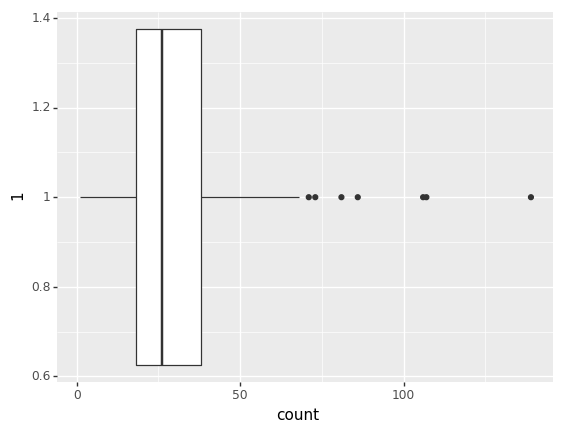

<ggplot: (8782748224015)>

In [41]:
(ggplot(df, aes(x = 1, y = 'count')) + 
    geom_boxplot() +
    coord_flip())

In [54]:
df = plsql.query("""{}
    select codoficina, region, count(distinct funasignadomask) from cleaned.inspections_se
    group by codoficina, region order by cast(region as int);""".format(role),
           engine)

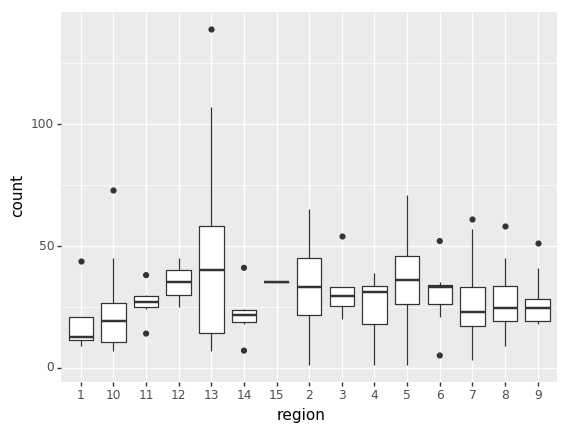

<ggplot: (8782745776683)>

In [55]:
(ggplot(df, aes(x = 'region', y = 'count')) + 
    geom_boxplot())

In [58]:
df = plsql.query("""{}
    select codoficina, cast(agno as varchar), count(distinct funasignadomask) from cleaned.inspections_se
    group by codoficina, agno order by agno;""".format(role),
           engine)

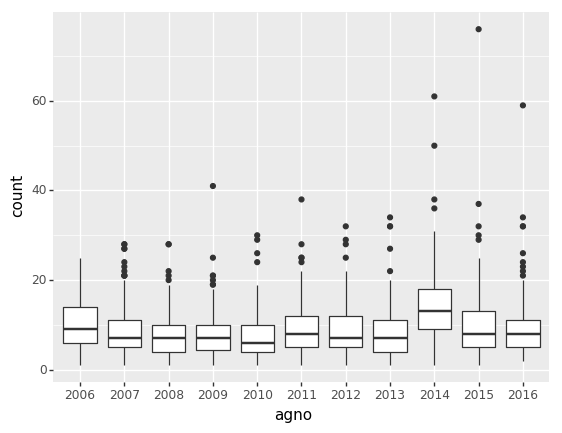

<ggplot: (8782745637822)>

In [59]:
(ggplot(df, aes(x = 'agno', y = 'count')) + 
    geom_boxplot())

In [37]:
plsql.query("""{}
    select count(*) from cleaned.inspections_se where funasignadomask is null;""".format(role),
           engine)

,count
0,0


In [74]:
# TODO: number of inspections conducted, proportion that resulted in violation, proportion that were not found, 
df = plsql.query("""{}
    select funasignadomask, sum(cast(infractor as int)) as infractor, count(*) as inspections, 
    sum(infra) as infra, sum(num_materias) as num_materias, 
    count(distinct agno) as years,
    count(distinct region) as regions
    from cleaned.inspections_se
    group by funasignadomask;
    """.format(role), engine)

In [75]:
df['infractionality'] = pd.to_numeric(df.infractor)/df.inspections
df['infra_materias'] = pd.to_numeric(df.infra)/df.num_materias

In [76]:
df.head()

,funasignadomask,infractor,inspections,infra,num_materias,years,regions,infractionality,infra_materias
0,0013736c82ba105e1626abec5e9f33623063b0b291dbb9...,32.0,104,39.0,341.0,7,1,0.307692,0.114370
1,005cb8a874bb1d3a996d991594e265f165ea88e3ee8ad5...,0.0,71,0.0,284.0,1,1,0.000000,0.000000
2,0075325f377e56dc1a5aa164f20009687ce93e84663850...,1604.0,3153,12930.0,28216.0,11,15,0.508722,0.458251
3,007cdd479566c8e2337bc7650c463b740e0537a42be20c...,834.0,1988,1388.0,6578.0,11,1,0.419517,0.211006
4,00ae8cabc704f64c9a5516a3d1e06276f1a12a71f5abab...,72.0,227,165.0,708.0,1,1,0.317181,0.233051


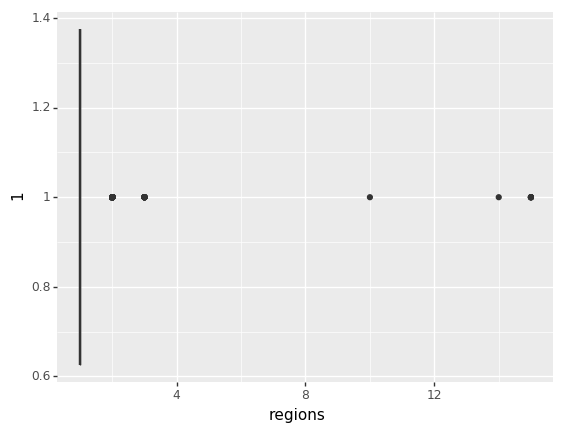

<ggplot: (8782745878571)>

In [77]:
(ggplot(df, aes(x = 1, y = 'regions')) + 
    geom_boxplot() +
    coord_flip())

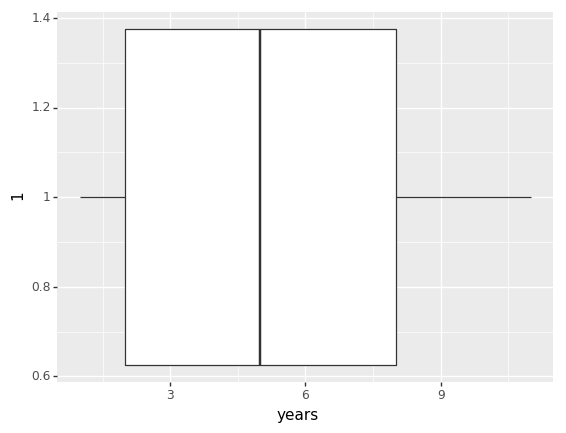

<ggplot: (-9223363254108970152)>

In [73]:
(ggplot(df, aes(x = 1, y = 'years')) + 
    geom_boxplot() +
    coord_flip())

In [ ]:
(ggplot(df, aes(x = 'years', y = 'infractor')) + 
    geom_boxplot() +
    coord_flip())